# Summary by task
Each task is unique, and how easily it can be solved by an LLM is likely dependent on the complexity of the problem, the number of times similar problems have been solved in the past, and the requirements of the solution.

In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat as nbf
from collections import Counter

# Task complexity
To approximate task complexity, I've evaluated each task based on the following criteria:
1) Number of unique library imports.
2) Number of lines of code in the reference solution

We should expect that more difficult tasks will require more lines of code, as well as a higher number of unique library imports. These are not causal relationships, as 'task complexity' is likely made up of many independent variables. However, in the limit, we could imagine that a very complex problem will involve a lot of unique libraries and a lot of code, whereas a simple solution will require few libraries and only a few lines of code.

In [367]:
case_dir = "../test_cases"
cell_count = Counter()
line_count = Counter()

for k in os.listdir(case_dir):
    if k.endswith("ipynb"):
        ntbk = nbf.read(os.path.join(case_dir, k), nbf.NO_CONVERT)
        k = k.replace(".ipynb","")
        source = ntbk["cells"][0]["source"]
        for line in source.split("\n"):
            #print(line) if "import" in line else None
            if "import" in line:
                cell_count[k] += 1
        if cell_count[k] == 0:
            cell_count[k] += 0
        line_count[k] += len([line for line in source.split("\n")])-cell_count[k]
#        print("====================================")


In [523]:
# Evaluating the different tasks
task_df = pd.merge(pd.DataFrame.from_dict(line_count, orient="index", columns=["Lines_in_Solution"]), 
         pd.DataFrame.from_dict(cell_count, orient="index", columns=["Number_of_Imports"]),
        left_index=True, right_index=True)
task_df

,Lines_in_Solution,Number_of_Imports
convex_hull_measure_area,6,1
measure_mean_image_intensity,5,1
region_growing_segmentation,6,1
workflow_segmentation_counting,9,2
label_binary_image_and_count_labels,8,2
extract_surface_measure_area,8,1
measure_aspect_ratio_of_regions,8,2
rgb_to_grey_image_transform,19,1
label_sequentially,7,1
count_objects_over_time,6,2


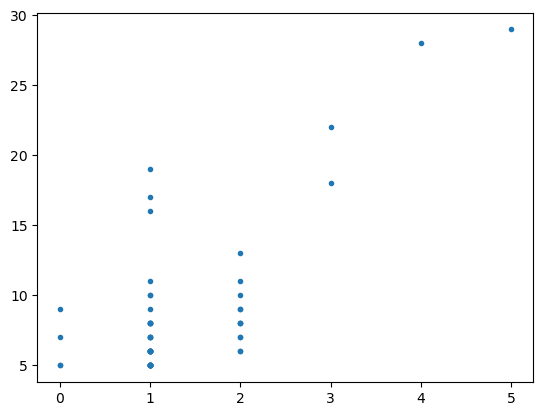

In [525]:
## A positive relationship between the number of imports and the number of lines of code.

# Task complexity as modelled by the number of imports against the number of lines required in the solution.
res = [(cell_count[test_case], line_count[test_case]) for test_case in cell_count]
plt.plot(np.transpose(res)[0], np.transpose(res)[1], '.')

In [370]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith("_results.jsonl"):
        print(filename)
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace(".jsonl_results.jsonl", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_gemini-1.5-flash-001.jsonl_results.jsonl
samples_llama3-70b-instruct-q4_0.jsonl_results.jsonl
samples_gpt-4-1106-preview.jsonl_results.jsonl
samples_codegemma-7b-instruct-fp16.jsonl_results.jsonl
samples_codellama-70b-instruct-q4_0.jsonl_results.jsonl
samples_claude-3-5-sonnet-20240620.jsonl_results.jsonl
samples_gpt-4o-2024-05-13.jsonl_results.jsonl
samples_claude-3-opus-20240229.jsonl_results.jsonl
samples_gpt-4-turbo-2024-04-09.jsonl_results.jsonl
samples_mixtral-8x7b-instruct-v0.1-q5_0.jsonl_results.jsonl
samples_command-r-plus-104b-q4_0.jsonl_results.jsonl
samples_gemini-pro.jsonl_results.jsonl
samples_gpt-3.5-turbo-1106.jsonl_results.jsonl
samples_mixtral-8x22b-instruct-v0.1-q4_0.jsonl_results.jsonl
samples_llama3-8b-instruct-fp16.jsonl_results.jsonl
samples_reference.jsonl_results.jsonl
samples_llama3-70b-instruct-q8_0.jsonl_results.jsonl
samples_codellama.jsonl_results.jsonl
samples_phi3-3.8b-mini-instruct-4k-fp16.jsonl_results.jsonl


In [526]:
df = pd.concat(collection)
# Ensure the 'passed' column is boolean for correct processing.
df['passed'] = df['passed'].astype(bool)
# shorten task name
df['task_id'] = [str(t).replace("../test_cases/", "").replace(".ipynb","") for t in df['task_id']]

# Pivot the dataframe to count True 'passed' values for each model-task combination.
pivot_df = df.pivot_table(index='task_id', columns='model', values='passed', aggfunc='mean', fill_value=0)

# Reset the index if 'task_id' needs to be a column instead of an index
pivot_df.reset_index(inplace=True)

# Apply formatting to display only two digits after the decimal point for all columns after the first (task_id column)
pivot_df = pivot_df.round(2)

pivot_df.head()

df = pivot_df
numerical_data = df.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)
sorted_means = df.transpose().iloc[1:].mean().sort_values(ascending=False)
df["Average_Task_Score"] = df.iloc[:,1:-1].mean(axis=1) # excludes the reference
task_score_df = pd.merge(df, task_df, left_on="task_id", right_index=True)
task_score_df.head()

,task_id,claude-3-5-sonnet-20240620,claude-3-opus-20240229,codegemma-7b-instruct-fp16,codellama,codellama-70b-instruct-q4_0,command-r-plus-104b-q4_0,gemini-1.5-flash-001,gemini-pro,gpt-3.5-turbo-1106,...,llama3-70b-instruct-q4_0,llama3-70b-instruct-q8_0,llama3-8b-instruct-fp16,mixtral-8x22b-instruct-v0.1-q4_0,mixtral-8x7b-instruct-v0.1-q5_0,phi3-3.8b-mini-instruct-4k-fp16,reference,Average_Task_Score,Lines_in_Solution,Number_of_Imports
0,apply_otsu_threshold_and_count_postiive_pixels,0.0,0.0,0.6,0.0,0.0,0.2,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.050000,10,2
1,binary_closing,1.0,1.0,0.2,0.0,0.1,0.1,0.0,0.0,0.1,...,0.7,0.5,0.1,0.5,0.3,0.2,1.0,0.372222,6,2
2,binary_skeleton,0.8,0.6,0.5,0.1,0.1,0.0,0.0,0.0,0.1,...,0.3,0.2,0.0,0.0,0.2,0.0,1.0,0.305556,5,1
3,bland_altman,1.0,1.0,0.8,0.2,0.3,0.1,1.0,0.6,1.0,...,1.0,1.0,0.5,0.9,0.5,0.8,1.0,0.761111,11,1
4,combine_columns_of_tables,1.0,0.1,0.3,0.1,0.2,0.3,0.3,0.7,0.9,...,1.0,0.9,0.1,0.9,0.7,0.5,1.0,0.577778,8,1


,task_id,claude-3-5-sonnet-20240620,claude-3-opus-20240229,codegemma-7b-instruct-fp16,codellama,codellama-70b-instruct-q4_0,command-r-plus-104b-q4_0,gemini-1.5-flash-001,gemini-pro,gpt-3.5-turbo-1106,...,llama3-70b-instruct-q4_0,llama3-70b-instruct-q8_0,llama3-8b-instruct-fp16,mixtral-8x22b-instruct-v0.1-q4_0,mixtral-8x7b-instruct-v0.1-q5_0,phi3-3.8b-mini-instruct-4k-fp16,reference,Average_Task_Score,Lines_in_Solution,Number_of_Imports
33,open_nifti_image,1.0,1.0,1.0,0.3,0.9,0.6,1.0,0.8,1.0,...,0.8,0.7,0.3,0.7,0.4,0.8,1.0,0.794444,9,2
41,return_hello_world,1.0,1.0,0.9,0.6,0.3,0.1,1.0,1.0,1.0,...,0.7,0.6,0.4,0.8,1.0,0.9,1.0,0.794444,5,0
3,bland_altman,1.0,1.0,0.8,0.2,0.3,0.1,1.0,0.6,1.0,...,1.0,1.0,0.5,0.9,0.5,0.8,1.0,0.761111,11,1
48,t_test,1.0,1.0,0.8,0.3,0.4,0.4,1.0,0.5,1.0,...,0.8,0.5,0.1,0.9,0.6,0.8,1.0,0.722222,8,1
10,create_umap,1.0,1.0,0.8,0.0,0.3,0.2,1.0,0.8,1.0,...,1.0,1.0,0.7,0.1,0.9,0.4,1.0,0.716667,10,1
35,pair_wise_correlation_matrix,1.0,1.0,0.4,0.1,0.6,0.2,1.0,0.5,1.0,...,1.0,1.0,0.3,1.0,0.6,0.2,1.0,0.711111,7,0
18,label_sequentially,1.0,1.0,0.4,0.1,0.4,0.2,0.0,0.1,0.8,...,0.9,1.0,0.3,0.9,0.8,0.2,1.0,0.577778,7,1
4,combine_columns_of_tables,1.0,0.1,0.3,0.1,0.2,0.3,0.3,0.7,0.9,...,1.0,0.9,0.1,0.9,0.7,0.5,1.0,0.577778,8,1
50,transpose_image_axes,1.0,1.0,0.1,0.5,0.2,0.2,1.0,0.2,1.0,...,1.0,0.8,0.4,0.3,0.2,0.5,1.0,0.533333,5,1
22,maximum_intensity_projection,0.8,0.9,0.6,0.0,0.4,0.3,0.1,0.0,1.0,...,0.7,0.8,0.1,0.6,0.1,0.2,1.0,0.533333,5,1


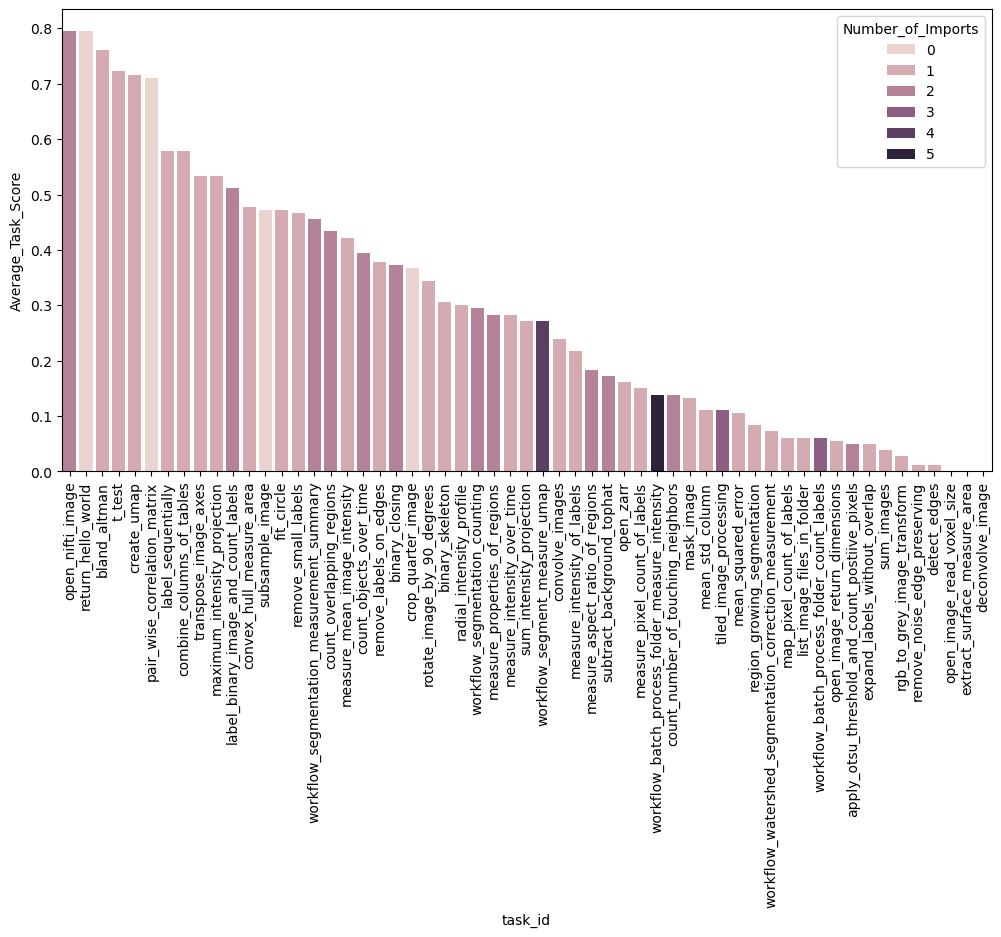

In [547]:
## Illustrating the difference in task solve rate across all LLMs.
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(task_score_df.sort_values(by="Average_Task_Score",ascending=False), x="task_id", y="Average_Task_Score", hue="Number_of_Imports")
ax.tick_params(axis='x', labelrotation=90)

# for item in tasks.get_xticklabels():
#     item.set_rotation(45)

<Axes: xlabel='Lines_in_Solution', ylabel='Average_Task_Score'>

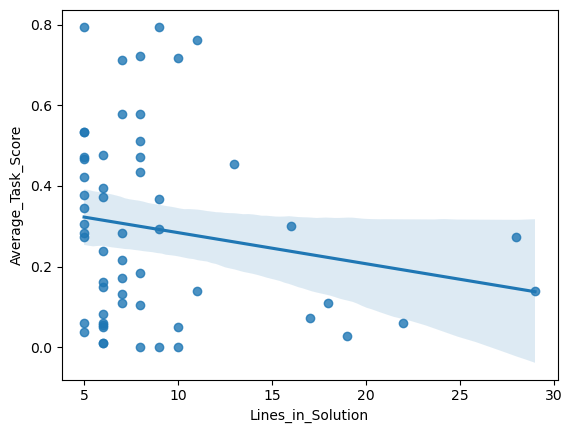

In [527]:
## Average task score as measured across all models, when regressed against the number of lines in 
sns.regplot(task_score_df, x="Lines_in_Solution", y="Average_Task_Score")

<Axes: xlabel='Number_of_Imports', ylabel='Average_Task_Score'>

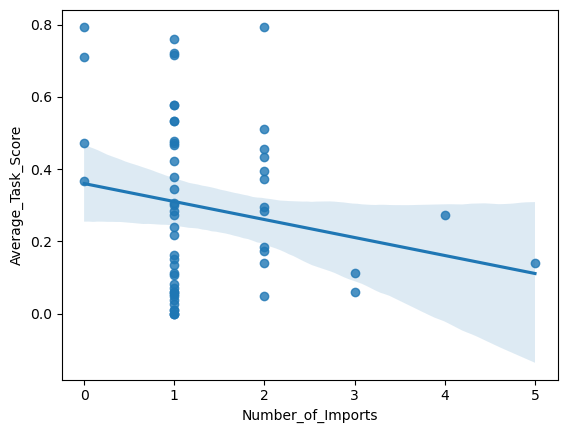

In [508]:
## Average task score as measured across all models
sns.regplot(task_score_df, x="Number_of_Imports", y="Average_Task_Score")

In [472]:
# task_score_df["Average_Score"].sort_values(ascending=False)
from scipy.stats import linregress
colnames=task_score_df.columns[1:-4].tolist()
slopes = []
for enum, colname in enumerate(colnames):
    cur_slope = linregress(task_score_df[colname], task_score_df["Number_of_Imports"]).slope
    slopes.append(cur_slope)
    print(f"{colname:<40}, {cur_slope}")

slope_idx = np.argsort(slopes)
sorted_colnames_nImport = np.array(colnames)[slope_idx][::-1]
sorted_colnames_nImport
slopes

claude-3-5-sonnet-20240620              , 0.15996326202594624
claude-3-opus-20240229                  , -0.1913319648321004
codegemma-7b-instruct-fp16              , -0.2764842840512224
codellama                               , -1.696428571428572
codellama-70b-instruct-q4_0             , -1.2230447376890883
command-r-plus-104b-q4_0                , -0.726332358893636
gemini-1.5-flash-001                    , -0.4633595051153934
gemini-pro                              , -0.7057949479940561
gpt-3.5-turbo-1106                      , -0.7125103562551789
gpt-4-1106-preview                      , 0.28276180095581466
gpt-4-turbo-2024-04-09                  , -0.09815317060570829
gpt-4o-2024-05-13                       , -0.0705794947994057
llama3-70b-instruct-q4_0                , -0.5094239447836475
llama3-70b-instruct-q8_0                , -0.44165244512446306
llama3-8b-instruct-fp16                 , -1.5269804822043627
mixtral-8x22b-instruct-v0.1-q4_0        , -0.8631534805703103
mixtral-

[0.15996326202594624,
 -0.1913319648321004,
 -0.2764842840512224,
 -1.696428571428572,
 -1.2230447376890883,
 -0.726332358893636,
 -0.4633595051153934,
 -0.7057949479940561,
 -0.7125103562551789,
 0.28276180095581466,
 -0.09815317060570829,
 -0.0705794947994057,
 -0.5094239447836475,
 -0.44165244512446306,
 -1.5269804822043627,
 -0.8631534805703103,
 -1.1834232466895536,
 -0.7925526503204802]

In [496]:
slopes_lSolution = []
intercepts_lSolution = []

for enum, colname in enumerate(colnames):
    cur_reg = linregress(task_score_df["Lines_in_Solution"], task_score_df[colname])
    slopes_lSolution.append(cur_reg.slope)
    intercepts_lSolution.append(cur_reg.intercept)
    print(colname)

slope_idxs = np.argsort(intercepts_lSolution)
sorted_colnames_lSolution = np.array(colnames)[slope_idxs][::-1]
sorted_colnames_lSolution

claude-3-5-sonnet-20240620
claude-3-opus-20240229
codegemma-7b-instruct-fp16
codellama
codellama-70b-instruct-q4_0
command-r-plus-104b-q4_0
gemini-1.5-flash-001
gemini-pro
gpt-3.5-turbo-1106
gpt-4-1106-preview
gpt-4-turbo-2024-04-09
gpt-4o-2024-05-13
llama3-70b-instruct-q4_0
llama3-70b-instruct-q8_0
llama3-8b-instruct-fp16
mixtral-8x22b-instruct-v0.1-q4_0
mixtral-8x7b-instruct-v0.1-q5_0
phi3-3.8b-mini-instruct-4k-fp16


array(['claude-3-opus-20240229', 'claude-3-5-sonnet-20240620',
       'gpt-4o-2024-05-13', 'gpt-4-turbo-2024-04-09',
       'gpt-3.5-turbo-1106', 'gpt-4-1106-preview',
       'llama3-70b-instruct-q4_0', 'gemini-1.5-flash-001',
       'llama3-70b-instruct-q8_0', 'mixtral-8x22b-instruct-v0.1-q4_0',
       'codegemma-7b-instruct-fp16', 'mixtral-8x7b-instruct-v0.1-q5_0',
       'codellama-70b-instruct-q4_0', 'phi3-3.8b-mini-instruct-4k-fp16',
       'gemini-pro', 'command-r-plus-104b-q4_0', 'codellama',
       'llama3-8b-instruct-fp16'], dtype='<U32')

In [520]:
mean_values_ordered_names = mean_values.index.tolist()[1:]

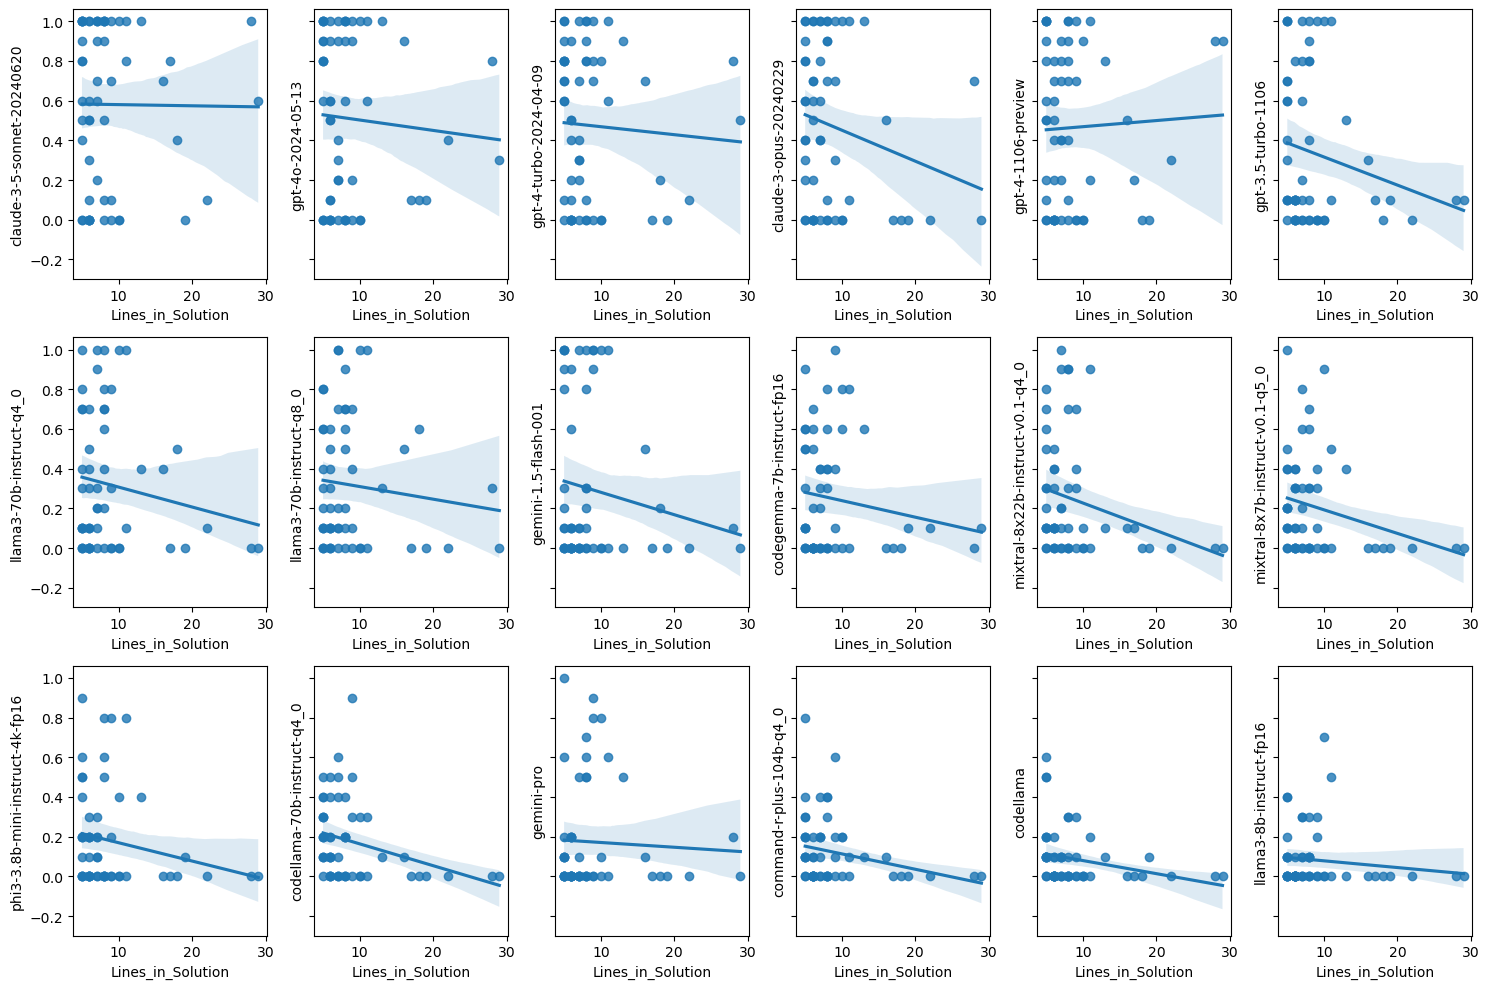

In [521]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(15,10), sharey=True)

for enum, colname in enumerate(mean_values_ordered_names):
    ax = axs.flatten()[enum]
    sns.regplot(task_score_df, x="Lines_in_Solution", y=colname, ax=ax)
#    ax.plot(task_score_df["Lines_in_Solution"], task_score_df[colname], '.')
#    ax.plot(
#    sns.regplot(task_score_df
plt.tight_layout()

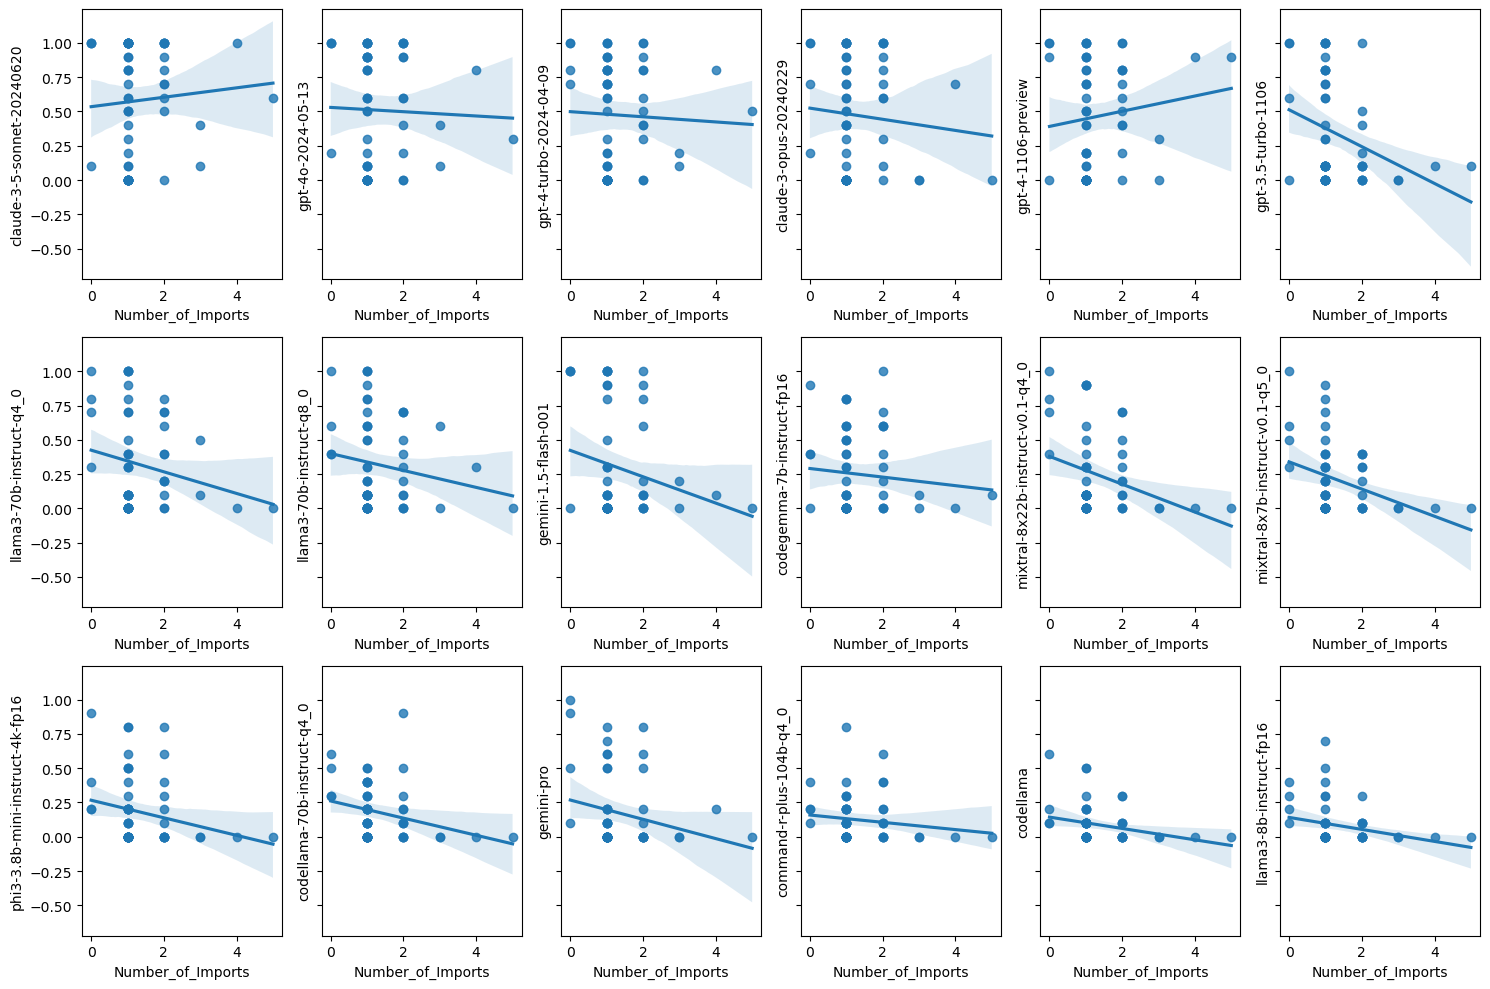

In [522]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(15,10), sharey=True)

for enum, colname in enumerate(mean_values_ordered_names):
    sns.regplot(task_score_df, x="Number_of_Imports", y=colname, ax=axs.flatten()[enum])
plt.tight_layout()

In [8]:
with open("model_order.txt", 'w') as f:
    for item in ordered_numerical_data.columns:
        f.write(str(item) + '\n')